In [ ]:
# reviewss = reviews.iloc[:3000].reset_index(drop=True)

In [ ]:
# import pandas as pd
# from langdetect import detect

# def is_english(text):
#     try:
#         lang = detect(text)
#         return lang == 'en'
#     except:
#         return False

# # Loop through the Series and remove non-English strings
# for index, value in reviewss.items():
#     if not is_english(value):
#         reviewss.drop(index, inplace=True)


In [13]:
# reviewss = reviewss.apply(lambda x: x + "%%%")

In [14]:
# reviewss.to_csv('1000 Facebook Playstore English.csv')

In [3]:
# !pip install langdetect

In [1]:
import pandas as pd
from datetime import datetime
import string
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv("Tokopedia_PlayStore 19.084 Play Store Indonesian Reviews Jan - Mei 2023.csv", header=0, parse_dates=[0], index_col=0, date_parser=parser)


In [2]:
df.head()

,content
at,
2023-05-31 23:35:25,"Meresahkan. Iya sih promonya menarik, tapi kur..."
2023-05-31 23:27:02,ntaps gan
2023-05-31 23:13:10,ATURAN TOKOPEDIA GAK MASUK AKAL. MASA MAU BELI...
2023-05-31 23:10:28,mantap
2023-05-31 23:03:48,Di tingkatkan lagi informasi pelacakan barang ...


In [3]:
reviews = df['content']

In [4]:
reviews.head()

at
2023-05-31 23:35:25    Meresahkan. Iya sih promonya menarik, tapi kur...
2023-05-31 23:27:02                                            ntaps gan
2023-05-31 23:13:10    ATURAN TOKOPEDIA GAK MASUK AKAL. MASA MAU BELI...
2023-05-31 23:10:28                                               mantap
2023-05-31 23:03:48    Di tingkatkan lagi informasi pelacakan barang ...
Name: content, dtype: object

In [5]:
reviews.tail()

at
2023-01-01 00:57:58    ga seru, masa vouchernya gabisa digabung harus...
2023-01-01 00:53:21                         is the best online shop , 👍👍
2023-01-01 00:34:16    Keren aduan saya kendala transaksi langsung di...
2023-01-01 00:27:33    Enak di toko sebelah cashback bisa digabung de...
2023-01-01 00:01:39    Mau pesen barang malah di batalin otomatis pad...
Name: content, dtype: object

In [6]:
len(reviews)

19084

In [7]:
all_reviews = ' '.join(reviews.astype(str).tolist())
all_reviews[:1000]

'Meresahkan. Iya sih promonya menarik, tapi kurirnya ga bertanggung jawab semua. Udah 3x beli ditokopedia pengirimannya sangat lama bahkan ga sampai. Bayangin aja beli sameday datengnya 4 hari kemudian, kurir sicepat dan anter aja yang ga mau anter paket sampe rumah. Maunya didepan gang aja, pdhl kurir lain dtg sampe rumah. Next tolong tokped bikin opsi ubah kurir kayak shopee. Jujur kesel aja zonk mulu beli disini, mana refund uangnya lama bgt hampir 3 hari. ntaps gan ATURAN TOKOPEDIA GAK MASUK AKAL. MASA MAU BELI VAPE MUSTI VERIFIKASI MUKA DAN KTP!!! GW KAN DAFTAR PAKAI EMAIL & NOMOR HP, REGISTRASI SIM CARD JUGA KAN SUDAH PAKE KTP, NAH LO TINGGAL LIAT AJA DATA² KTP GW YANG TERDAFTAR DI SIM CARD. LO KIRA GW MAU KREDIT APA PAKE VERIFIKASI MUKA & KTP. DASAR DEVELOPER TOLOL!!! BIKIN RIBET AJA!!! APAPUN BUATAN INDO SELALU GAK BERES!!! OTOMATIS PINDAH SHOPEE mantap Di tingkatkan lagi informasi pelacakan barang saat di kirim.. iya kita mengerti dengan sistem estiminasi. Tetapi yang minimal 

In [8]:
# NLTK tokenization
words = word_tokenize(all_reviews)

# Remove symbols and emoticons
filtered_words = [re.sub(r'[^\w\s]', '', word) for word in words]

# Remove stopwords
nltk.download('stopwords')
stopwords_id = set(stopwords.words('indonesian'))
filtered_words = [word for word in filtered_words if word.lower() not in stopwords_id]

# manual_sw = ["yg","nya","gak","ga","ya","dr","tp","gk","aja","tokopedia","tokped","aplikasi"]
# filtered_words = [word for word in filtered_words if word.lower() not in manual_sw]
filtered_reviews2 = ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
#Create the mask
masking = np.array(Image.open('Tokopedia.png'))

#Grab the mask colors
colors = ImageColorGenerator(masking)

In [55]:
# Generate the word cloud with additional parameters
wordcloud_rsw = WordCloud(
    width=3785,
    height=4267,
    mask=masking,
    background_color='black',
    color_func=colors,
    contour_color='green',
    contour_width=2,
    font_path='BauhausRegular.ttf',
    max_words=100,
    max_font_size=1000
).generate(filtered_reviews2)

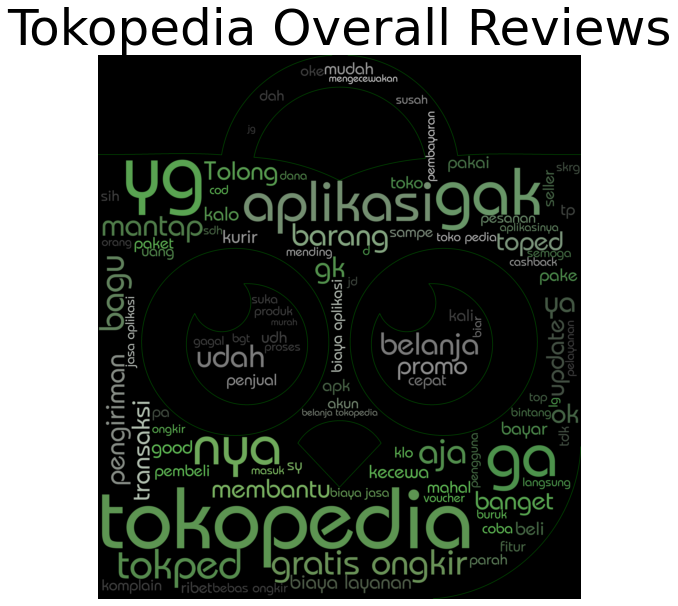

In [56]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_rsw, interpolation='bilinear')
plt.axis('off')
plt.title('Tokopedia Overall Reviews', fontsize=50, color='black')
plt.show()

In [59]:
dfs = pd.read_csv("Tokopedia_PlayStore 1000 PlayStore indonesian reviews sentiment.csv", header=0, parse_dates=[0], index_col=0)

In [60]:
dfs.head()

,content,sentiment
0,"Meresahkan. Iya sih promonya menarik, tapi kur...",-1.0
1,Di tingkatkan lagi informasi pelacakan barang ...,0.0
2,rewel di tagih terus kaya bocah .satu hari.lam...,-1.0
3,"Kurangin bintang lah,biaya aplikasi naik",-1.0
4,"suka sama paket belanja 10K dari tokped, semog...",1.0


In [61]:
dfs.tail()

,content,sentiment
995,Tlong donk tokopedia belanja 50 atau pas promo...,-1.0
996,Sangat mudah di mengerti,1.0
997,Makin kesini gratis ongkir makin terbatas. Pad...,-1.0
998,Parah banget skrg kalo checkout ada biaya laya...,-1.0
999,Mntap,1.0


In [62]:
dfs_sentiment_positive = dfs[dfs['sentiment'] == 1]
dfs_sentiment_negative = dfs[dfs['sentiment'] == -1]
dfs_sentiment_neutral = dfs[dfs['sentiment'] == 0]

In [63]:
print(len(dfs_sentiment_positive),len(dfs_sentiment_negative),len(dfs_sentiment_neutral))

309 590 99


In [67]:
def word_cloud(dfs_reviews,sentiment):
    reviews = dfs_reviews.iloc[:,0]
    all_reviews = ' '.join(reviews.astype(str).tolist())
    
    # NLTK tokenization
    words = word_tokenize(all_reviews)

    # Remove symbols and emoticons
    filtered_words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Remove stopwords
    nltk.download('stopwords')
    stopwords_id = set(stopwords.words('indonesian'))
    filtered_words = [word for word in filtered_words if word.lower() not in stopwords_id]

    # manual_sw = ["yg","nya","gak","ga","ya","dr","tp","gk","aja","tokopedia","tokped","aplikasi"]
    # filtered_words = [word for word in filtered_words if word.lower() not in manual_sw]
    filtered_reviews2 = ' '.join(filtered_words)

    # Generate the word cloud with additional parameters
    wordcloud_rsw = WordCloud(
        width=3785,
        height=4267,
        mask=masking,
        background_color='black',
        color_func=colors,
        contour_color='green',
        contour_width=2,
        font_path='BauhausRegular.ttf',
        max_words=100,
        max_font_size=1000
    ).generate(filtered_reviews2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud_rsw, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Tokopedia {sentiment} Reviews', fontsize=50, color='black')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


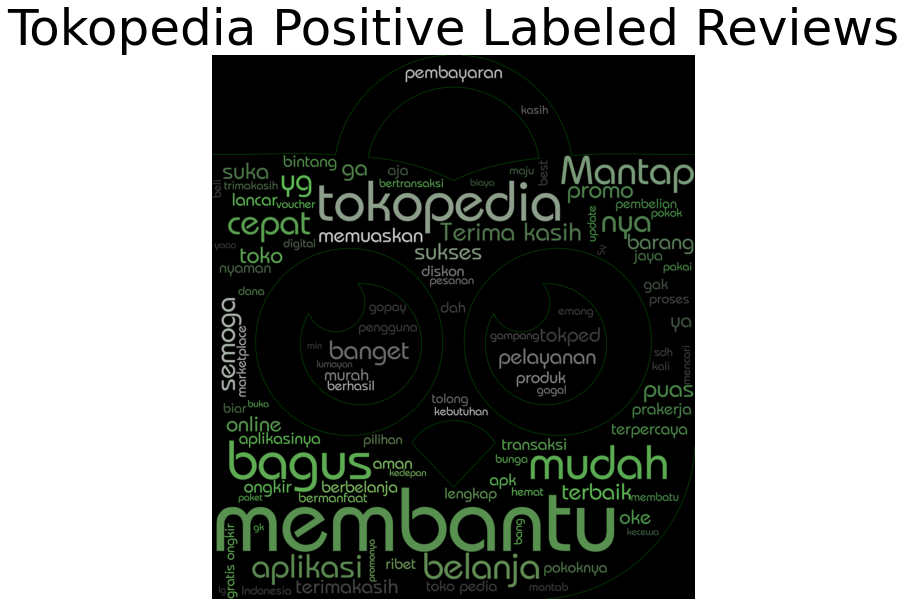

In [68]:
word_cloud(dfs_sentiment_positive,sentiment='Positive Labeled')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


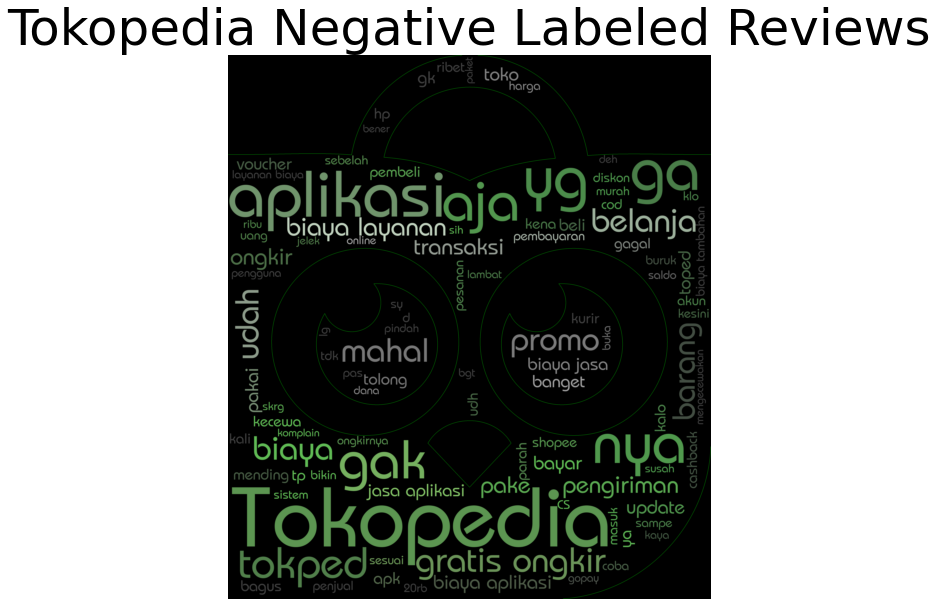

In [69]:
word_cloud(dfs_sentiment_negative,sentiment='Negative Labeled')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


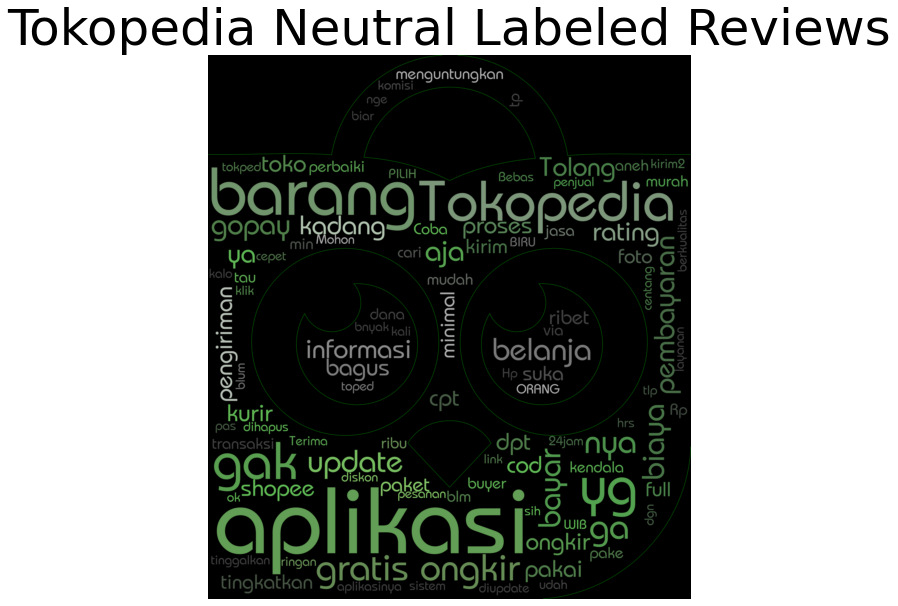

In [70]:
word_cloud(dfs_sentiment_neutral,sentiment='Neutral Labeled')